# Optimal Epsilon Parameter testing
The goal of this notebook is to find an optimal parameters to a given problem

In this notebook, I am using the implementation of the simple-bandit problem that is mentioned in the [simple_bandit_problem.ipynb](./simple_bandit_problem.ipynb). 

I am changing the implemention of the simple bandit class described in that notebook for the purposes of this work.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from simple_bandit import (
    Bandit, 
    StationaryMultiArmedBandit, 
    Agent
)

In [ ]:
def epsilon_experiment(T, alpha, epsilon_0, logscale=True):
    epsilon_list = []
    for i in range(T):
        epsilon = 1 / 2 * (1 + np.cos(i * np.pi / alpha)) * epsilon_0
        epsilon_list.append(epsilon)

    plt.plot(epsilon_list)
    plt.xlabel('Epoch')
    plt.ylabel('Epsilon')
    if logscale: plt.yscale('log')
    plt.show()

def simple_bandit_problem(arms, runs, steps, epsilon):
    '''Perform a run of the simple bandit problem.'''
    reward, action = Bandit.run_and_plot_experiments(
        steps=steps,
        exp_bandit_agent_dict={
            rf'$\epsilon={epsilon}$' : (
                StationaryMultiArmedBandit(
                    k=arms,
                    runs=runs
                    ), 
                Agent(
                    k=arms,
                    runs=runs,
                    epsilon=epsilon
                    )
                )
            }
        )

    return reward, action

def reward_vs_epsilon(T0, total_iterations, epsilon_0, arms, runs, steps, plot=True):
    '''
    Test how the distribution of reward changes with a change of 
    the epsilon parameter.

    Parameters
    ----------
    k. : Number of epochs
    T0 : Sub-epoch; one of the intervals of the epoch, for which the
        problem is tested.
    '''
    rewards_list = []
    epsilon_list = []
    k = 0
    for i in range(1):
        while k < total_iterations:
            j = k % T0
            epsilon = 1 / 2 * (1 + np.cos(j * np.pi / T0)) * epsilon_0
            epsilon_list.append(epsilon)
            reward, action = simple_bandit_problem(
                arms=arms,
                runs=runs,
                steps=steps, 
                epsilon=epsilon
            )
            rewards_list.append(np.mean(reward))
            k += 1
            print(f'\r{k} / {total_iterations} iterations done', end='', flush=True)
    
    if plot:
        fig, ax = plt.subplots()
        ax.plot(epsilon_list, rewards_list)
        ax.set_xlabel(r'$\epsilon$')
        ax.set_ylabel('Average Reward')
        ax.set_title(rf'$\epsilon_0$ = {epsilon_0}')
        # plt.show()

    return rewards_list, epsilon_list

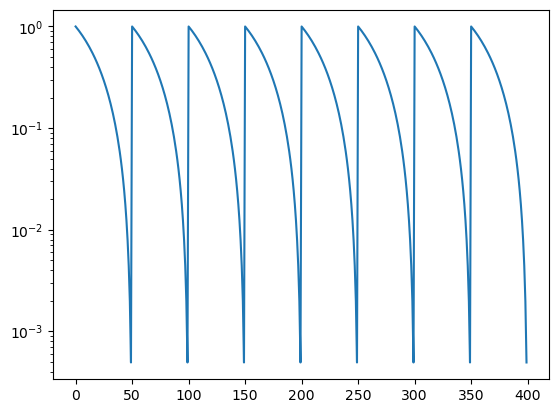

In [139]:
def fun(T0,r=None,m=None):
  s0=[]


  for i in range(1):
    T=T0
    s0=[]
    k=0
    while k<400:

      j=k%T

      n=2*np.sin((T-j)*np.pi/(4*T))**2
      s0.append(n)
      k=k+1


  return s0

plt.plot(fun(50))
plt.yscale('log')

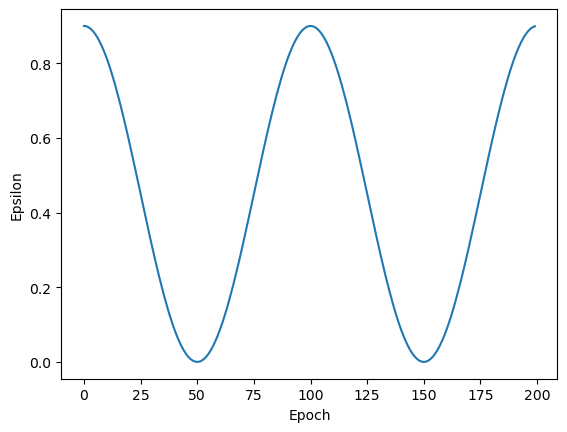

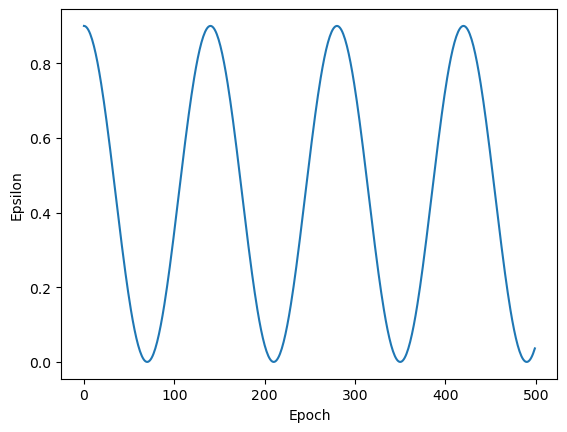

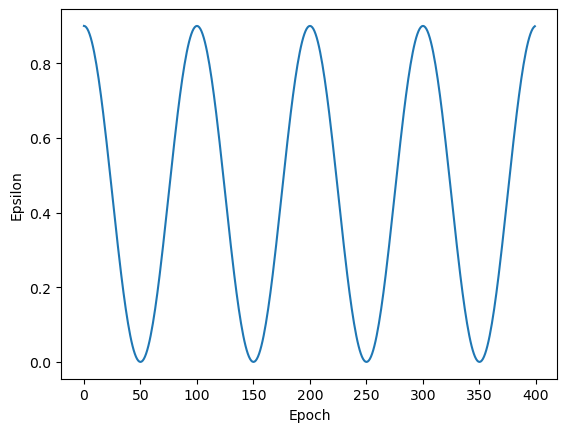

In [140]:
epsilon_experiment(T=200, alpha=50, epsilon_0=0.9, logscale=False)
epsilon_experiment(T=500, alpha=70, epsilon_0=0.9, logscale=False)
epsilon_experiment(T=400, alpha=50, epsilon_0=0.9, logscale=False)

200 / 200 iterations done

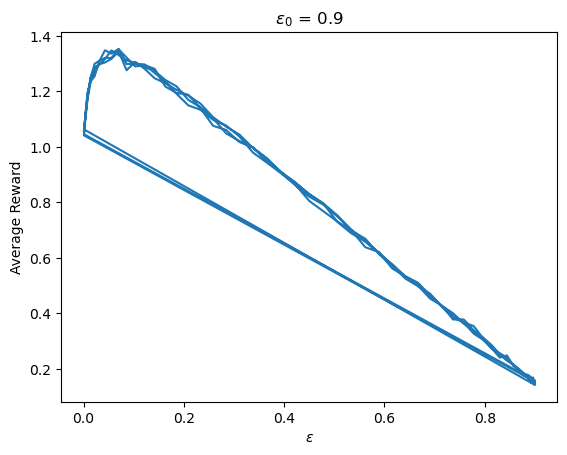

In [6]:
reward, epsilon = reward_vs_epsilon(
    T0=50, 
    total_iterations=200,
    epsilon_0=0.9, 
    arms=10, 
    runs=2000, 
    steps=1000
)

200 / 200 iteration done

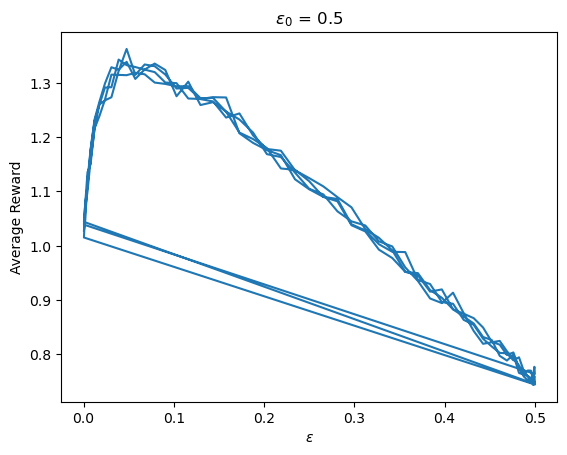

In [103]:
reward, epsilon = reward_vs_epsilon(
    T0=50, 
    total_iterations=200,
    epsilon_0=0.5, 
    arms=10, 
    runs=2000, 
    steps=1000
)

200 / 200 iteration done

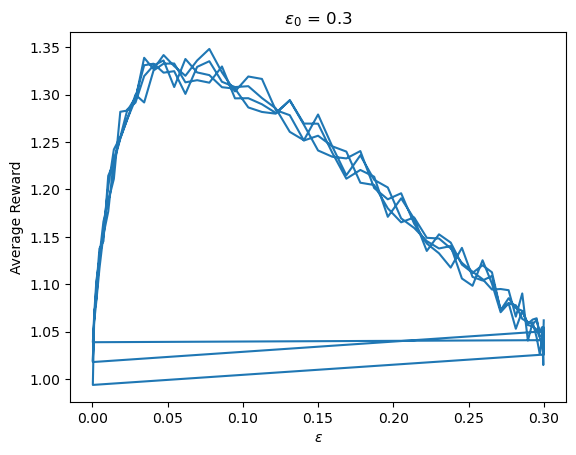

In [104]:
reward, epsilon = reward_vs_epsilon(
    T0=50, 
    total_iterations=200,
    epsilon_0=0.3, 
    arms=10, 
    runs=2000, 
    steps=1000
)

200 / 200 iteration done. Seed = 123 iteration completed
200 / 200 iteration done. Seed = 42 iteration completed
200 / 200 iteration done. Seed = 59 iteration completed
Average Reward = 0.9257682392826068
Average $\epsilon$ = 0.3474893619799801


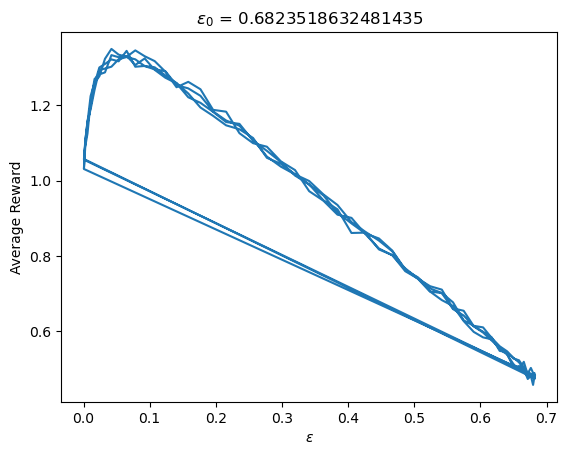

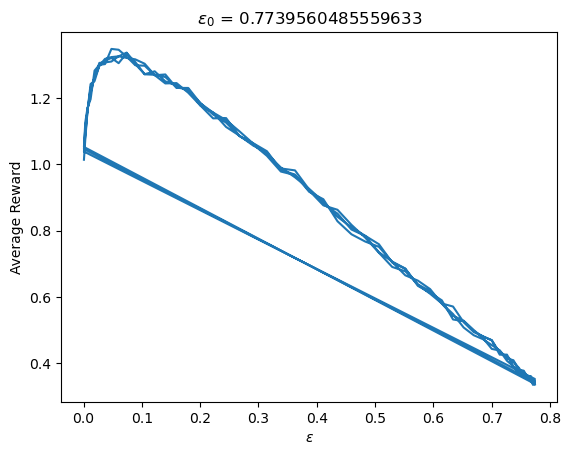

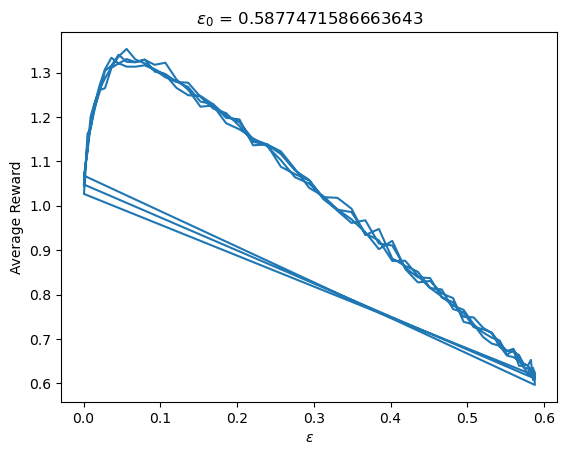

In [ ]:
# use rng for actions for a run of the algorithm
# run algo multiple times with different seeds
# report average results at the end
# use epsilon_min and epsilon_max. How?

seeds = [123, 42, 59]
rewards, epsilons = [], []
optimal_epsilon_list = []
for seed in seeds:
    rng = np.random.default_rng(seed=seed)
    epsilon_0 = rng.random() # choose a random number for the probability of actions
    reward, epsilon = reward_vs_epsilon(
        T0=50, 
        total_iterations=200,
        epsilon_0=epsilon_0, 
        arms=10, 
        runs=2000, 
        steps=1000
        )
    rewards.append(reward)
    epsilons.append(epsilon)
    optimal_epsilon_list.append(np.argmax(rewards))
    print(f'. Seed = {seed} iteration completed')

print(f'Average Reward = {np.mean(rewards)}')
print(rf'Average $\epsilon$ = {np.mean(epsilons)}')

Text(0, 0.5, 'Rewards')

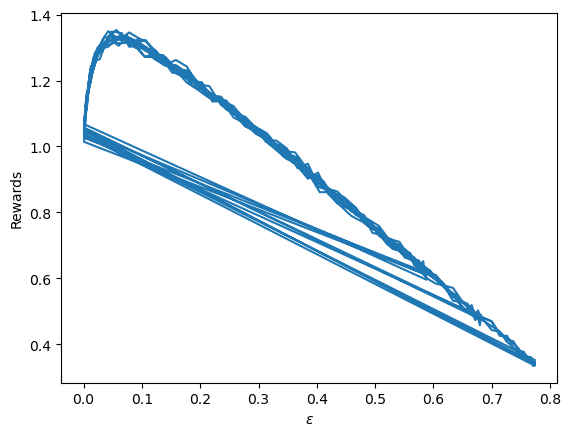

In [271]:
x = np.array(rewards).reshape(-1)
y = np.array(epsilons).reshape(-1)
plt.plot(y, x)
plt.xlabel(r'$\epsilon$')
plt.ylabel('Rewards')

In [305]:
def reward_vs_epsilon(T0, total_iterations, epsilon_0, arms, runs, steps, plot=True):
    '''
    Test how the distribution of reward changes with a change of 
    the epsilon parameter.

    Parameters
    ----------
    T0: int
        Sub-epoch; one of the intervals of the epoch, for which the
        problem is tested.
    total_iterations: int
        Total number of iterations to run this algorithm for.
    epsilon_0: float
        Inital epsilon value to run the simple bandit problem 
        as well as the epsilon parameter problem.
    arms: int
        Number of arms for the simple bandit problem.
    runs: int
        Number of runs for which the x number of steps are run 
        in the simple bandit problem.
    steps: int
        Number of steps for which the simple bandit problem is run
        for each independent run.
    plot: bool
        If True, plots average reward vs epsilon. 
    '''
    rewards_list = []
    epsilon_list = []
    k = 0 # Iterator
    for i in range(1):
        while k < total_iterations:
            j = k % T0
            epsilon = 1 / 2 * (1 + np.cos(j * np.pi / T0)) * epsilon_0
            epsilon_list.append(epsilon)
            reward, action = simple_bandit_problem(
                arms=arms,
                runs=runs,
                steps=steps, 
                epsilon=epsilon
            )
            rewards_list.append(np.mean(reward))
            k += 1
            print(f'\r{k} / {total_iterations} iterations done', end='', flush=True)
    
    if plot:
        fig, ax = plt.subplots()
        ax.plot(epsilon_list, rewards_list)
        ax.set_xlabel(r'$\epsilon$')
        ax.set_ylabel('Average Reward')
        ax.set_title(rf'$\epsilon_0$ = {epsilon_0}')

    return rewards_list, epsilon_list

200 / 200 iterations done

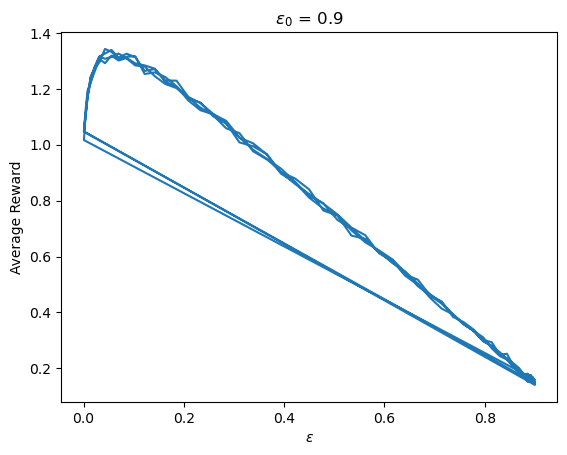

In [306]:
reward, epsilon = reward_vs_epsilon(
    T0=50, 
    total_iterations=200,
    epsilon_0=0.9, 
    arms=10, 
    runs=2000, 
    steps=1000
)

200 / 200 iterations done. Seed = 123 iteration completed
200 / 200 iterations done. Seed = 42 iteration completed
200 / 200 iterations done. Seed = 59 iteration completed
200 / 200 iterations done. Seed = 234 iteration completed
200 / 200 iterations done. Seed = 1235 iteration completed
200 / 200 iterations done. Seed = 132 iteration completed
200 / 200 iterations done. Seed = 62 iteration completed
200 / 200 iterations done. Seed = 367 iteration completed
200 / 200 iterations done. Seed = 72 iteration completed
200 / 200 iterations done. Seed = 1923 iteration completed
Average Reward = 0.9893835694171044
Average $\epsilon$ = 0.2950017087008508


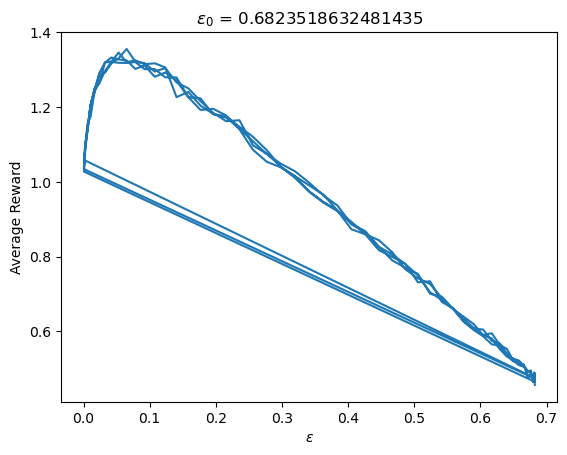

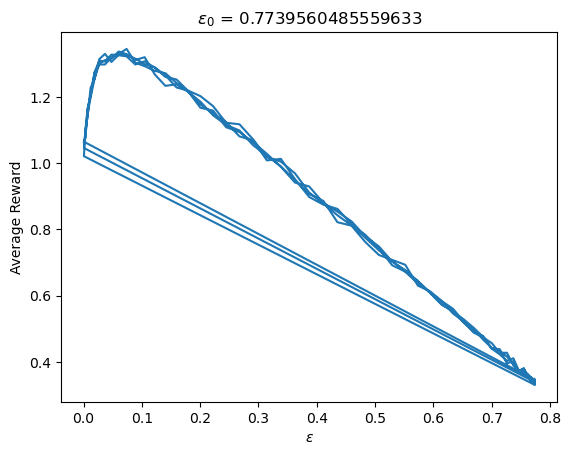

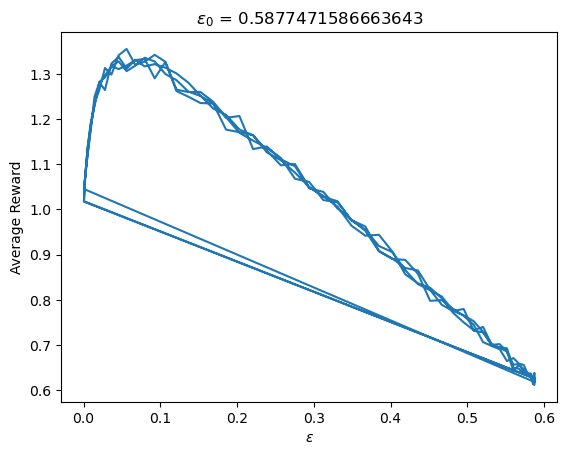

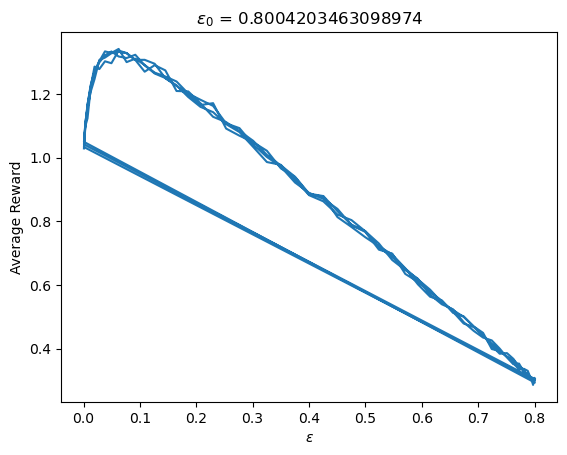

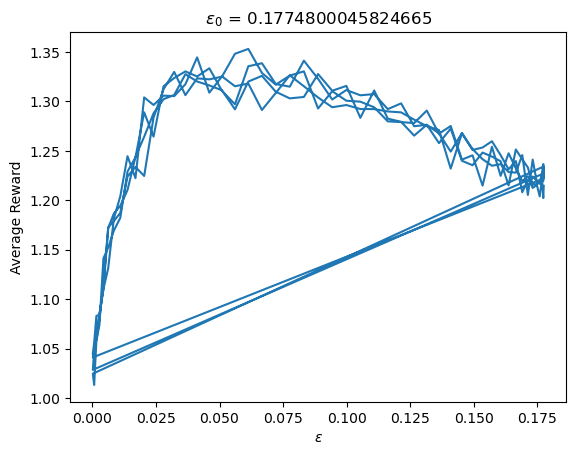

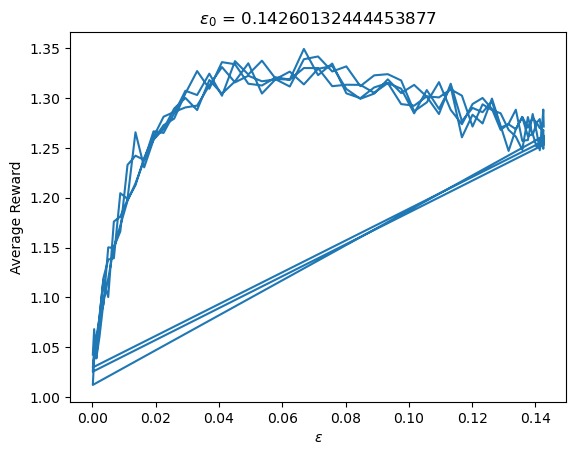

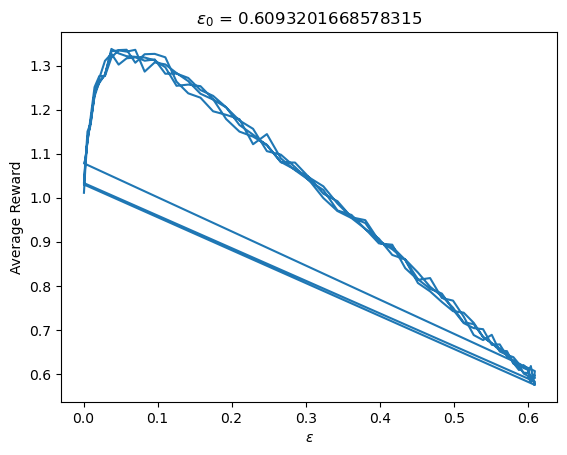

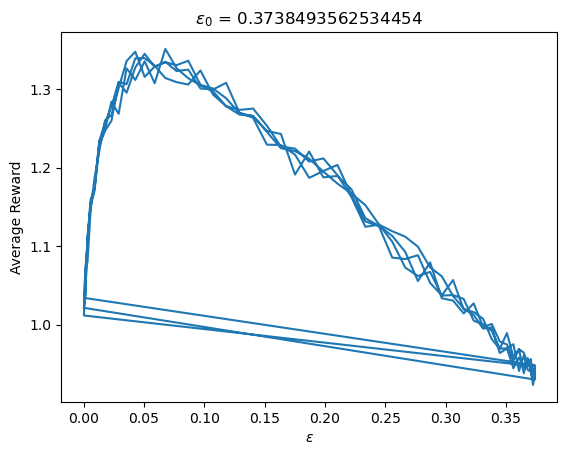

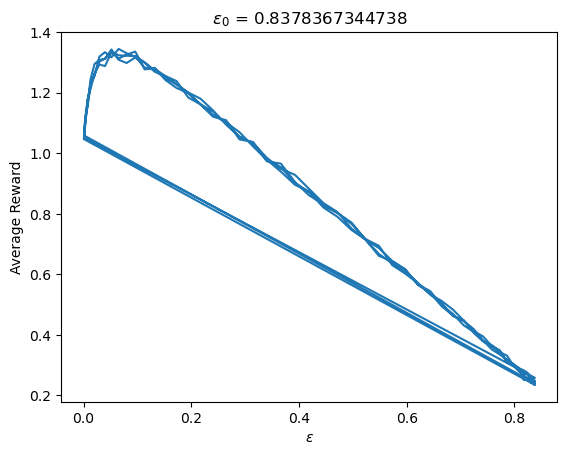

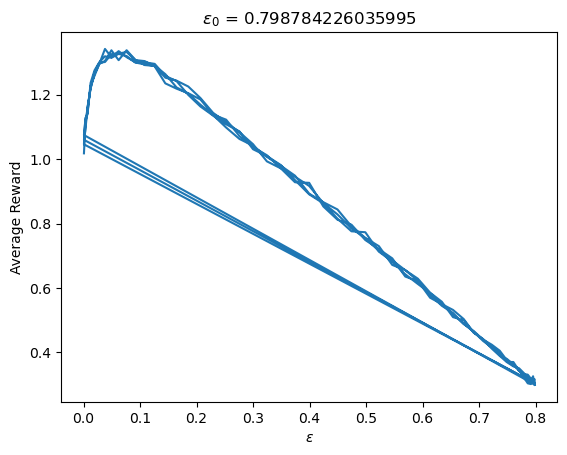

In [ ]:
'''
1. Create 10 different seeds to create 10 random numbers. These random numbers
are being used as the probability of taking random action by the simple bandit
problem.
2. Run this experiment with the 10 seeds and get the epsilons corresponding 
to the maximum reward for each of the 10 runs (`optimal_epsilon_list`). 
3. Using `optimal_epsilon_list`, use the minimum and maximum epsilon from
the `optimal_epsilon_list` and use that in the equation 5 of the research paper.
4. Plot the average reward vs epsilons
'''

seeds = [123, 42, 59, 234, 1235, 132, 62, 367, 72, 1923]
rewards = np.array([])
epsilons = np.array([])
optimal_epsilon_list = []

# Use each seed to create a random number that is being used as the epsilon_0
# for the simple bandit problem
for seed in seeds:
    rng = np.random.default_rng(seed=seed)
    # choose a random number between 0 and 1 
    # to use as the probability of random action in the simple bandit problem
    epsilon_0 = rng.random() 
    reward, epsilon = reward_vs_epsilon(
        T0=50, 
        total_iterations=200,
        epsilon_0=epsilon_0, 
        arms=10, 
        runs=2000, 
        steps=1000
    )

    rewards = np.append(rewards, reward)
    epsilons = np.append(epsilons, epsilon)
    max_index_epsilon = np.argmax(rewards)
    optimal_epsilon_list = np.append(optimal_epsilon_list, epsilons[max_index_epsilon])
    print(f'. Seed = {seed} iteration completed')

print(f'Average Reward = {np.mean(rewards)}')
print(rf'Average $\epsilon$ = {np.mean(epsilons)}')

In [292]:
print(optimal_epsilon_list)

[0.0651588  0.0651588  0.05612486 0.05612486 0.05612486 0.05612486
 0.05612486 0.05612486 0.05612486 0.05612486]


In [ ]:
def updated_reward_vs_epsilon(T0, total_iterations, epsilon_0, arms, runs, steps, plot=True):
    '''Test how reward changes with a change of the epsilon paremeter in equation 5 of
    https://arxiv.org/pdf/1608.03983.as_integer_ratio
    
    Parameters
    ----------
    T0: int
        Sub-epoch; one of the intervals of the epoch, for which
    the problem is tested.
    total_iterations: int
        Total number of interations to run this algorithm for. 
    epsilon_0: list
        List containing the optimal epsilons from n runs.
    arms: int
        Number of arms for the simple bandit problem.
    runs: int
        Number of runs for which the x number of steps are run in the
        simple bandit problem. 
    steps: int
        Number of steps for which the simple bandit problem is 
        run for each independent run.
    plot: bool
        if True, plots average reward vs epsilon.'''
    rewards_list = []
    epsilon_list = []
    k = 0
    for i in range(1):
        while k < total_iterations:
            j = k % T0
            # epsilon = 1 / 2 * (1 + np.cos(j * np.pi / T0)) * epsilon_0
            epsilon = (epsilon_0.min() + 1 / 2 * (epsilon_0.max() - epsilon_0.min())) * (1 / 2 * (1 + np.cos(j * np.pi / T0)))
            epsilon_list.append(epsilon)
            reward, action = simple_bandit_problem(
                arms=arms,
                runs=runs,
                steps=steps, 
                epsilon=epsilon
            )
            rewards_list.append(np.mean(reward))
            k += 1
            print(f'\r{k} / {total_iterations} iterations done', end='', flush=True)
    
    if plot:
        fig, ax = plt.subplots()
        ax.plot(epsilon_list, rewards_list)
        ax.set_xlabel(r'$\epsilon$')
        ax.set_ylabel('Average Reward')
        # ax.set_title(rf'$\epsilon_0$ = {epsilon_0}')
        # plt.show()

    return rewards_list, epsilon_list

# rewards = np.append(rewards, reward)
# epsilons = np.append(epsilons, epsilon)
# max_index_epsilon = np.argmax(rewards)
# optimal_epsilon_list = np.append(optimal_epsilon_list, epsilons[max_index_epsilon])
# print(f'. Seed = {seed} iteration completed')

IndentationError: unexpected indent (2456714720.py, line 26)

In [299]:
optimal_epsilon_list.min(), optimal_epsilon_list.max()

(np.float64(0.05612485945484348), np.float64(0.06515880486849267))

200 / 200 iterations done

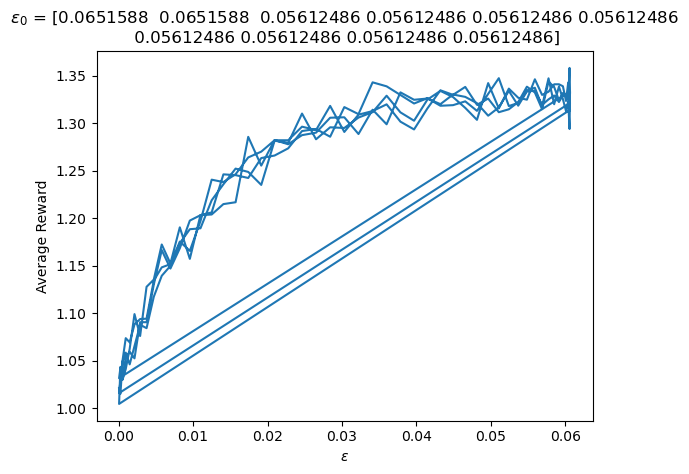

In [ ]:
b

100 / 100 iterations done

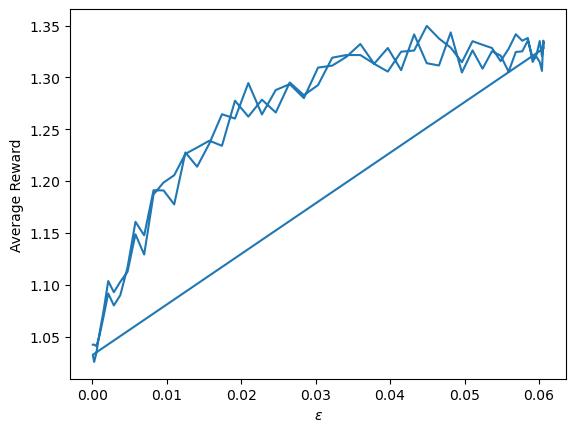

In [304]:
reward, epsilon = updated_reward_vs_epsilon(
        T0=50, 
        total_iterations=100,
        epsilon_0=optimal_epsilon_list, 
        arms=10, 
        runs=2000, 
        steps=1000
        )